In [16]:
import scipy, scipy.stats
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import __future__

In [2]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
        (3 - abs(x)) / 2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
        ) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

In [33]:
def metropolis_hastings(proposal, n = 1000):
    x_sample = 0
    x_range = scipy.linspace(-7, 7, 1000)
    y = np.array([proposal(x)*n/10 for x in x_range])
    
    samples = []
    for i in range(n):
        y_sample = proposal(x_sample)
        new_sample = scipy.stats.norm(x_sample, 2).rvs(1)[0]
        
        if random.random() < min(1, proposal(new_sample)/y_sample):
            x_sample = new_sample
        #take a thousand steps between samples
        if not i % 1: samples.append(x_sample)
        
    
    plt.hist(samples , bins=100)
    plt.plot(x_range, y)
    plt.show()
    
    #return samples

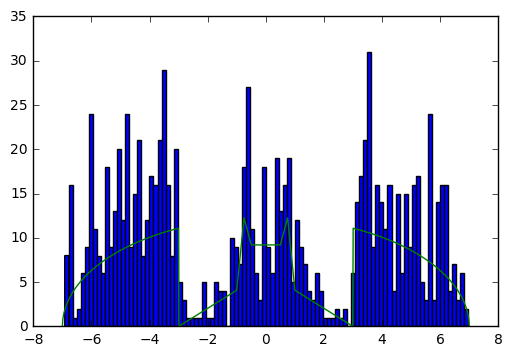

In [34]:
metropolis_hastings(f)